## Solar Radiation Predection

#### Importing packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#settings for packages
sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 120)

#### Loading  data

In [131]:
data=pd.read_csv('SolarPrediction.csv')

In [132]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00


#### Checking size of data

In [133]:
data.shape

(32686, 11)

#### Checking unique values in each column

In [134]:
data.nunique()

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

#### Dropping Extra Columns

In [135]:
data=data.drop(columns=['UNIXTime'])

#### Checking missing values

In [136]:
data.isnull().sum()

Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

No missing value found in the data.

#### Checking datatypes of each columns

In [137]:
data.dtypes

Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

#### Feature Engineering

In [138]:
new_df=data.copy()

In [139]:
#splitting date time columns to get month, day, hour, minute and second seperately
new_df['Data']=pd.to_datetime(new_df['Data'])
new_df['Time']=pd.to_datetime(new_df['Time'])

new_df['month']=new_df['Data'].dt.month
new_df['day']=new_df['Data'].dt.day
new_df['hour']=new_df['Time'].dt.hour
new_df['minute']=new_df['Time'].dt.minute
new_df['second']=new_df['Time'].dt.second

In [140]:
#splitting sunset and sunrise time columns to get hour and minute seperately
new_df['TimeSunRise']=pd.to_datetime(new_df['TimeSunRise'])
new_df['TimeSunSet']=pd.to_datetime(new_df['TimeSunSet'])

new_df['SunRise_Hour']=new_df['TimeSunRise'].dt.hour
new_df['SunRise_Minute']=new_df['TimeSunRise'].dt.minute
new_df['SunSet_Hour']=new_df['TimeSunSet'].dt.hour
new_df['SunSet_Minute']=new_df['TimeSunSet'].dt.minute

In [141]:
new_df.drop(columns=['Data','Time','TimeSunRise','TimeSunSet'],inplace=True)

#### Data After Feature Engineering

In [142]:
new_df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,SunRise_Hour,SunRise_Minute,SunSet_Hour,SunSet_Minute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


#### Statically Describing data

In [143]:
new_df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,SunRise_Hour,SunRise_Minute,SunSet_Hour,SunSet_Minute
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,15.825766,11.557425,27.556691,17.441902,6.0,27.640519,17.347886,37.317904
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,8.711824,6.912034,17.268507,12.951109,0.0,15.518714,0.476307,15.938416
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,6.0,7.000000,17.000000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,9.000000,6.000000,15.000000,5.000000,6.0,14.000000,17.000000,26.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,16.000000,12.000000,30.000000,18.000000,6.0,24.000000,17.000000,43.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,23.000000,18.000000,45.000000,22.000000,6.0,40.000000,18.000000,48.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,31.000000,23.000000,57.000000,59.000000,6.0,57.000000,18.000000,59.000000


#### Regression Plots

<function matplotlib.pyplot.show(close=None, block=None)>

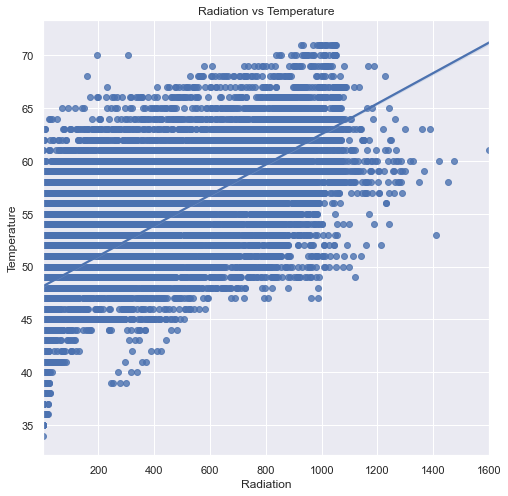

In [144]:
x_axis='Radiation'
y_axis='Temperature'

plt.figure(figsize=(8,8))                                 #Figure Size
plt.grid(True)                                            #enable Grid
sns.regplot(x=x_axis, y=y_axis, data=new_df)
plt.title(x_axis+' vs '+y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

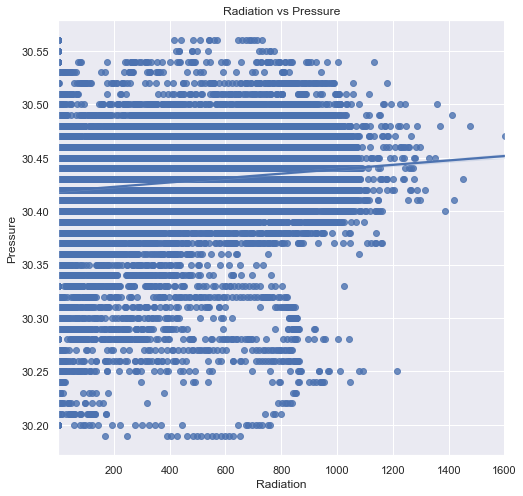

In [145]:
x_axis='Radiation'
y_axis='Pressure'

plt.figure(figsize=(8,8))                                 #Figure Size
plt.grid(True)                                            #enable Grid
sns.regplot(x=x_axis, y=y_axis, data=new_df)
plt.title(x_axis+' vs '+y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

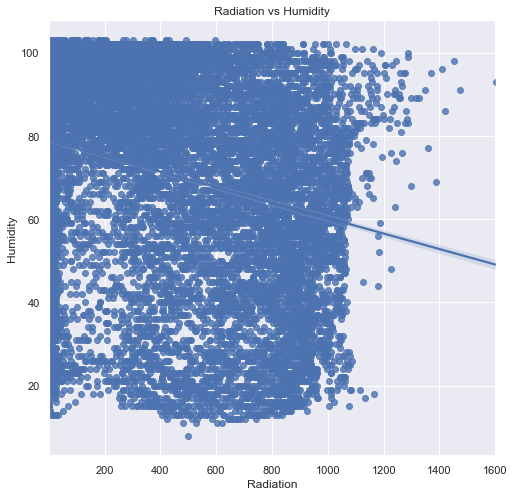

In [146]:
x_axis='Radiation'
y_axis='Humidity'

plt.figure(figsize=(8,8))                                 #Figure Size
plt.grid(True)                                            #enable Grid
sns.regplot(x=x_axis, y=y_axis, data=new_df)
plt.title(x_axis+' vs '+y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

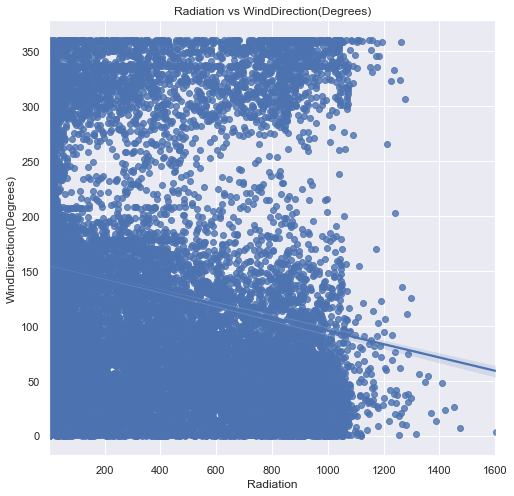

In [147]:
x_axis='Radiation'
y_axis='WindDirection(Degrees)'

plt.figure(figsize=(8,8))                                 #Figure Size
plt.grid(True)                                            #enable Grid
sns.regplot(x=x_axis, y=y_axis, data=new_df)
plt.title(x_axis+' vs '+y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

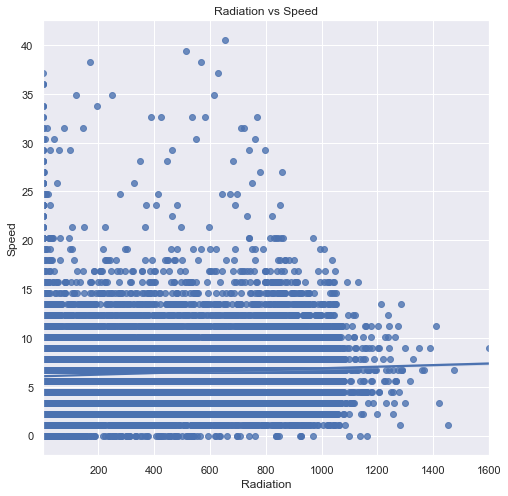

In [148]:
x_axis='Radiation'
y_axis='Speed'

plt.figure(figsize=(8,8))                                 #Figure Size
plt.grid(True)                                            #enable Grid
sns.regplot(x=x_axis, y=y_axis, data=new_df)
plt.title(x_axis+' vs '+y_axis)
plt.show

#### Distribution Plots

In [149]:
new_df.nunique()

Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
month                         4
day                          31
hour                         24
minute                       27
second                       60
SunRise_Hour                  1
SunRise_Minute               51
SunSet_Hour                   2
SunSet_Minute                56
dtype: int64

<AxesSubplot:xlabel='Radiation', ylabel='Count'>

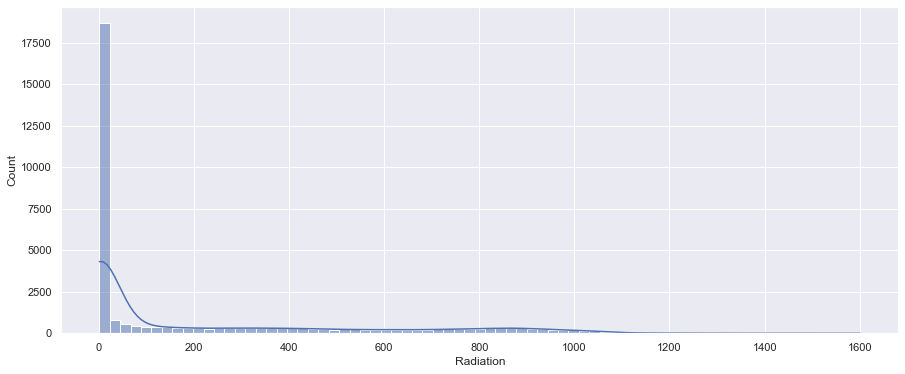

In [150]:
plt.subplots(figsize=(15,6))
sns.histplot(data=new_df, x="Radiation", kde=True)

#### Comparing Radiations w.r.t. months using Box plot

<AxesSubplot:xlabel='month', ylabel='Radiation'>

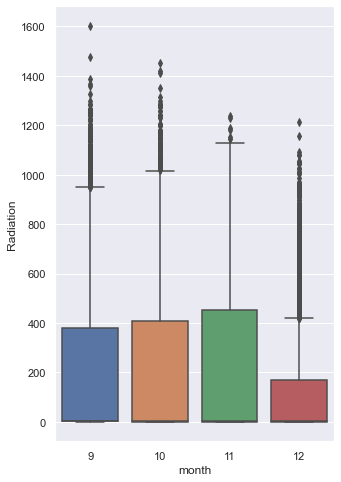

In [151]:
plt.figure(figsize=(5,8))         
sns.boxplot(x="month", y="Radiation", data=new_df)

#### Representing and checking correlation among columns

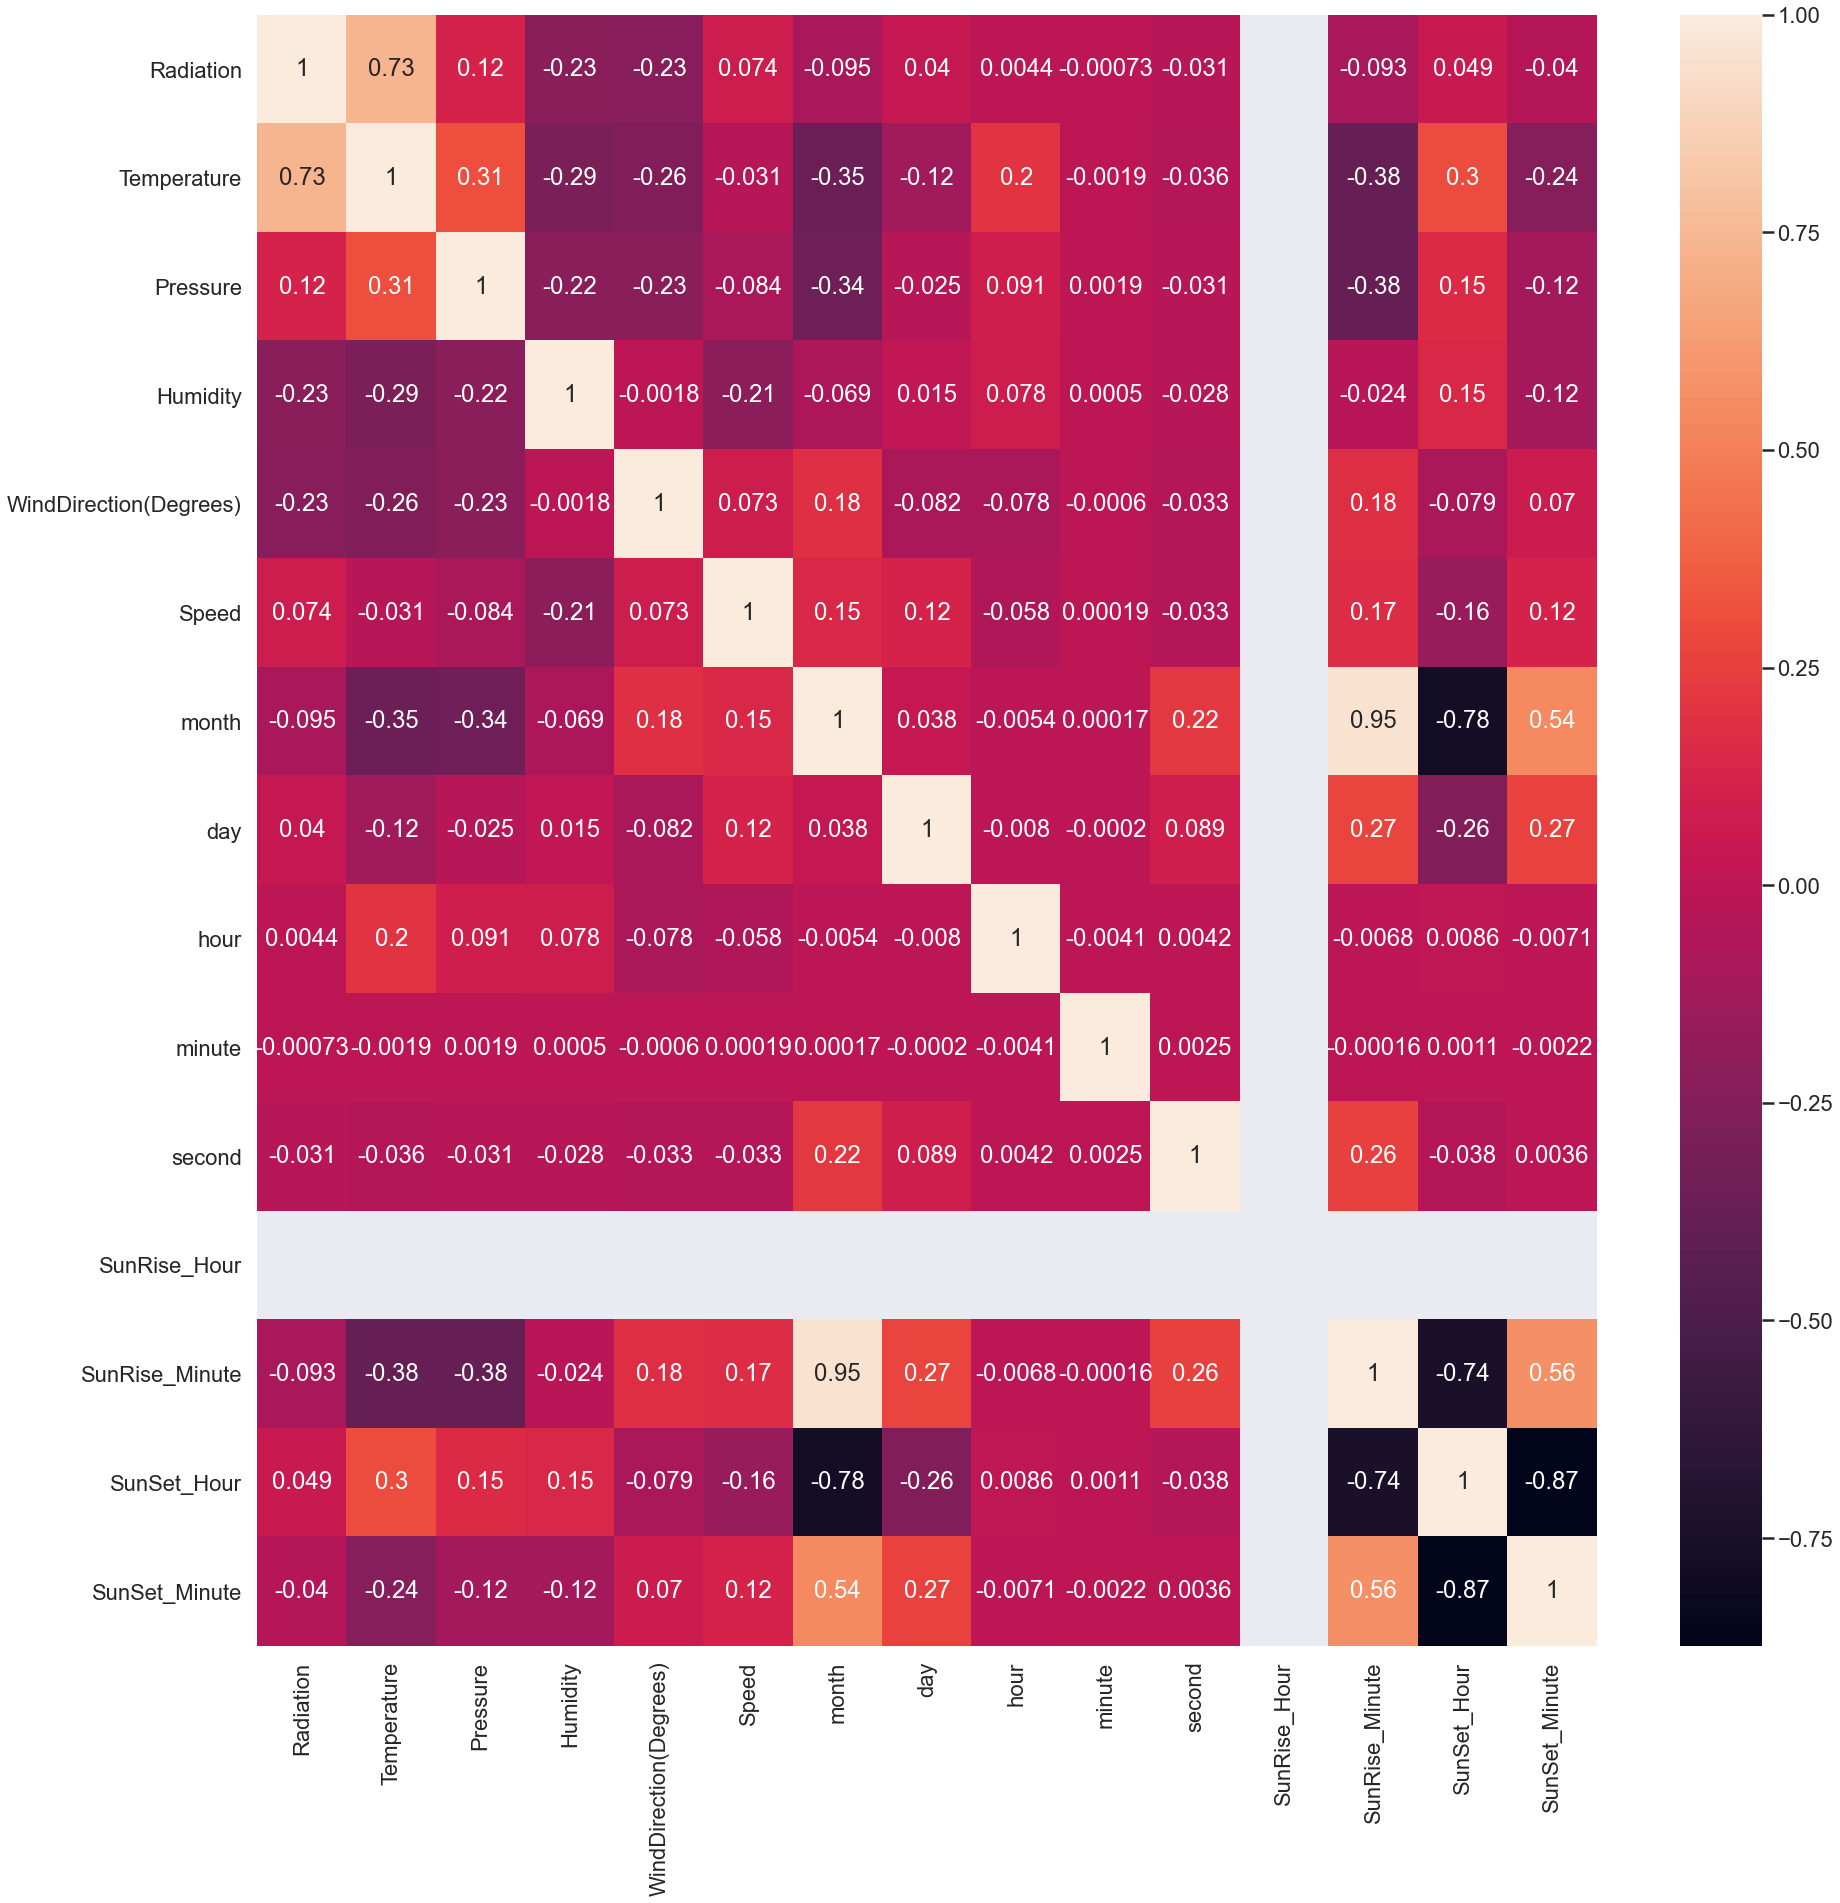

In [152]:
cor = new_df.corr() #calculating the correlations of the dataset
sns.set_context('poster')                   
plt.figure(figsize=(30,30))                 
sns.heatmap(cor, annot=True, fmt='.2g');    

It can be observed there are some strong correlation present in some columns. For example, radiation and temprature have a strong corelation. This could be a good feature for predicting radiation.

#### Seperating Independent and Dependent

In [153]:
X = new_df.drop(['Radiation'], axis=1)
Y = new_df[['Radiation']]
print(X.shape)
print(Y.shape)

(32686, 14)
(32686, 1)


#### Train Test Split the data

<img src='train_test_split1.png' width=80%, height=80% >

In [154]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(22880, 14) (22880, 1)
(9806, 14) (9806, 1)


#### Linear Regression Model

In [155]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)

lr_predict = lr.predict(xtest)



lr_predict_train = lr.predict(xtrain)

In [156]:
from sklearn.metrics import r2_score

lr_r2_test=r2_score(ytest,lr_predict )
lr_r2_train =r2_score(ytrain,lr_predict_train)

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rmse_lr_test = sqrt(mean_squared_error(ytest, lr_predict))
rmse_lr_train = sqrt(mean_squared_error(ytrain, lr_predict_train))
mae_lr_test = mean_squared_error(ytest, lr_predict)
mae_lr_train = mean_squared_error(ytrain, lr_predict_train)

In [158]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

print("Root Mean Squared Error  (RMSE) Linear Regression (Training): ",rmse_lr_train)
print("Root Mean Squared Error  (RMSE) Linear Regression (Testing): ",rmse_lr_test)
print("Mean Absolute Error      (MAE)  Linear Regression (Training): ",mae_lr_train)
print("Mean Absolute Error      (MAE)  Linear Regression (Testing): ",mae_lr_test)

R2 score for Linear Regression Training Data is:  0.6309572806179892
R2 score for Linear Regression Testing Data is:  0.6259715776105709
Root Mean Squared Error  (RMSE) Linear Regression (Training):  192.23253873041804
Root Mean Squared Error  (RMSE) Linear Regression (Testing):  192.44842295695776
Mean Absolute Error      (MAE)  Linear Regression (Training):  36953.34894674167
Mean Absolute Error      (MAE)  Linear Regression (Testing):  37036.395498620106


#### Decision Trees

In [159]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(xtrain, ytrain)

dt_predict = dt.predict(xtest)
dt_predict_train = dt.predict(xtrain)

In [160]:
from sklearn.metrics import r2_score

dt_r2_test=r2_score(ytest,dt_predict )
dt_r2_train =r2_score(ytrain,dt_predict_train)

In [161]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_dt_test = sqrt(mean_squared_error(ytest, dt_predict))
rmse_dt_train = sqrt(mean_squared_error(ytrain, dt_predict_train))
mae_dt_test = mean_squared_error(ytest, dt_predict)
mae_dt_train = mean_squared_error(ytrain, dt_predict_train)

In [162]:
print('R2 score for Decision Tree Training Data is: ', dt_r2_train)
print('R2 score for Decision Tree Testing Data is: ', dt_r2_test)
print("Root Mean Squared Error (RMSE) Decision Tree (Training Data): ",rmse_dt_train)
print("Root Mean Squared Error (RMSE) Decision Tree (Testing Data): ",rmse_dt_test)
print("Mean Absolute Error     (MAE)  Decision Tree (Training Data): ",mae_dt_train)
print("Mean Absolute Error     (MAE)  Decision Tree (Testing Data): ",mae_dt_test)

R2 score for Decision Tree Training Data is:  0.9220905045509982
R2 score for Decision Tree Testing Data is:  0.8914871804670186
Root Mean Squared Error (RMSE) Decision Tree (Training Data):  88.3250265220751
Root Mean Squared Error (RMSE) Decision Tree (Testing Data):  103.65794096525406
Mean Absolute Error     (MAE)  Decision Tree (Training Data):  7801.31031012527
Mean Absolute Error     (MAE)  Decision Tree (Testing Data):  10744.968725156094


#### Random Forrest

In [163]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(xtrain, ytrain.values.ravel())

rf_predict = rf.predict(xtest)
rf_predict_train = rf.predict(xtrain)

In [164]:
from sklearn.metrics import r2_score

rf_r2_test=r2_score(ytest,rf_predict )
rf_r2_train =r2_score(ytrain,rf_predict_train)

In [165]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_rf_test = sqrt(mean_squared_error(ytest, rf_predict))
rmse_rf_train = sqrt(mean_squared_error(ytrain, rf_predict_train))
mae_rf_test = mean_squared_error(ytest, rf_predict)
mae_rf_train = mean_squared_error(ytrain, rf_predict_train)

In [166]:
print('R2 score for Random Forest Training Data is: ', rf_r2_train)
print('R2 score for Random Forest Testing Data is: ', rf_r2_test)
print("Root Mean Squared Error (RMSE) Random Forest (Training Data): ",rmse_rf_train)
print("Root Mean Squared Error (RMSE) Random Forest (Testing Data): ",rmse_rf_test)
print("Mean Absolute Error     (MAE)  Random Forest (Training Data): ",mae_rf_train)
print("Mean Absolute Error     (MAE)  Random Forest (Testing Data): ",mae_rf_test)

R2 score for Random Forest Training Data is:  0.9912170441055581
R2 score for Random Forest Testing Data is:  0.9347648711473757
Root Mean Squared Error (RMSE) Random Forest (Training Data):  29.655751340363953
Root Mean Squared Error (RMSE) Random Forest (Testing Data):  80.37163737561872
Mean Absolute Error     (MAE)  Random Forest (Training Data):  879.4635875614983
Mean Absolute Error     (MAE)  Random Forest (Testing Data):  6459.600094437952


#### Gradient Boosting

In [167]:
from sklearn.ensemble import GradientBoostingRegressor

gb =  GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=10)
gb.fit(xtrain, ytrain.values.ravel())

gb_predict = gb.predict(xtest)
gb_predict_train = gb.predict(xtrain)

In [168]:
from sklearn.metrics import r2_score

gb_r2_test=r2_score(ytest,gb_predict )
gb_r2_train =r2_score(ytrain,gb_predict_train)

In [169]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_gb_test = sqrt(mean_squared_error(ytest, gb_predict))
rmse_gb_train = sqrt(mean_squared_error(ytrain, gb_predict_train))
mae_gb_test = mean_squared_error(ytest, gb_predict)
mae_gb_train = mean_squared_error(ytrain, gb_predict_train)

In [170]:
print('R2 score for Gradient Boosting Training Data is: ', gb_r2_train)
print('R2 score for Gradient Boosting Testing Data is: ', gb_r2_test)
print("Root Mean Squared Error (RMSE) Gradient Boosting Training Data: ",rmse_gb_train)
print("Root Mean Squared Error (RMSE) Gradient Boosting Testing Data: ",rmse_gb_test)
print("Mean Absolute Error     (MAE)  Gradient Boosting (Training Data): ",mae_gb_train)
print("Mean Absolute Error     (MAE)  Gradient Boosting (Testing Data): ",mae_gb_test)

R2 score for Gradient Boosting Training Data is:  0.9947000284249883
R2 score for Gradient Boosting Testing Data is:  0.9325464026313136
Root Mean Squared Error (RMSE) Gradient Boosting Training Data:  23.036969684540406
Root Mean Squared Error (RMSE) Gradient Boosting Testing Data:  81.72682207593748
Mean Absolute Error     (MAE)  Gradient Boosting (Training Data):  530.7019722464337
Mean Absolute Error     (MAE)  Gradient Boosting (Testing Data):  6679.273446631941


#### Comparing All the models

In [171]:
M_dict = { "model-name": ['Linear Regression','Decision Trees','Random Forrest','Gradient Boosting'],
            "R2 Score (Training)": [lr_r2_train,   dt_r2_train,   rf_r2_train,   gb_r2_train],
           "R2 Score (Testing)":   [lr_r2_test,    dt_r2_test,    rf_r2_test,    gb_r2_test],
           "RMSE (Training)":      [rmse_lr_train, rmse_dt_train, rmse_rf_train, rmse_gb_train],
           "RMSE (Testing)":       [rmse_lr_test,  rmse_dt_test,  rmse_rf_test,  rmse_gb_test],
           "MAE (Training)":       [mae_lr_train,   mae_dt_train,   mae_rf_train,   mae_gb_train],
           "MAE (Testing)":       [mae_lr_test,   mae_dt_test,   mae_rf_test,   mae_gb_test]
          
                }
comparison=pd.DataFrame(M_dict)
comparison

,model-name,R2 Score (Training),R2 Score (Testing),RMSE (Training),RMSE (Testing),MAE (Training),MAE (Testing)
0,Linear Regression,0.630957,0.625972,192.232539,192.448423,36953.348947,37036.395499
1,Decision Trees,0.922091,0.891487,88.325027,103.657941,7801.310310,10744.968725
2,Random Forrest,0.991217,0.934765,29.655751,80.371637,879.463588,6459.600094
3,Gradient Boosting,0.994700,0.932546,23.036970,81.726822,530.701972,6679.273447


#### Conclusion

- We trained total 5 models on the data.
- The models were evaluated on RMSE and R2 score. 
- It was found that Random Forrest was the best performing with the highest R2 value and lowest RMSE

#### Input Code

This is just for testing

In [71]:
#Specifiying Name of columns
col_names=['Temperature', 
           'Pressure', 
           'Humidity',
           'WindDirection(Degrees)', 
           'Speed', 
           'month', 
           'day', 
           'hour', 
           'minute',
           'second', 
           'SunRise_Hour', 
           'SunRise_Minute', 
           'SunSet_Hour',
           'SunSet_Minute']

#Specifying the input of columns for prediction, Change the input here
Input = pd.DataFrame([[48.00,                     # Temperature
                       30.46,                     # Pressure
                       64.00,                     # Humidity
                       120.20,                    # WindDirection(Degrees)
                       5.62,                      # Speed
                       9.00,                      # month
                       29.00,                     # day
                       23.00,                     # hour
                       30.00,                     # minute
                       24.00,                     # second
                       6.00,                      # SunRise_Hour 
                       13.00,                     # SunRise_Minute 
                       18.00,                     # SunSet_Hour
                       13.00]],                   # SunSet_Minute
                     columns=col_names) #Setting Column Name 

#### Predicted Output (Radiation) 

In [74]:
output=rf.predict(Input)                       #Predicting Output based on input values
print("Pridicted Radiation value:", round(output[0],3))          #Displaying Pridicted Output

Pridicted Radiation value: 1.216
